### XGBoost_Pred_15OUT2020_AD_dfa_K40

## bibliotecas a serem usadas

In [1]:
import plotly_express as px
# biblioteca nova, para visualização com diferentes formas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy
import seaborn as sns
import statsmodels
import statsmodels.stats.api as sms

In [2]:
# parâmetros dos gráficos para o arquivo
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

### arquivo_dados_formatados_agrupados

In [3]:
df=pd.read_csv('d_f_a.csv',encoding = "ISO-8859-1", sep=";", low_memory=False, nrows=1000000)
# somente 100 mil linhas, tempo computação adequável

In [4]:
df.head(3)

cod_muni diag_princ  prevalencia  renda_media_mora  SITU1_entorno  \
0    290010        J04     0.000121          0.103943       0.463481   
1    290010        J06     0.000121          0.103943       0.463481   
2    290010        J15     0.000602          0.103943       0.463481   

   SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  SITU6_entorno  \
0            0.0            0.0            0.0       0.083528            0.0   
1            0.0            0.0            0.0       0.083528            0.0   
2            0.0            0.0            0.0       0.083528            0.0   

   ...  V032_domicilio02  V033_domicilio02  V034_domicilio02  \
0  ...          0.005892           0.39911          0.016835   
1  ...          0.005892           0.39911          0.016835   
2  ...          0.005892           0.39911          0.016835   

   V035_domicilio02  V036_domicilio02  V037_domicilio02  V038_domicilio02  \
0          0.035354               0.0          0.010582          0.970779   
1          0.035354               0.0          0.010582          0.970779   
2          0.035354               0.0          0.010582          0.970779   

   V041_domicilio02  V045_domicilio02  V089_domicilio02  
0          0.027417          0.490861          0.509139  
1          0.027417          0.490861          0.509139  
2          0.027417          0.490861          0.509139  

[3 rows x 81 columns]

In [5]:
df.fillna(0.0001)

cod_muni diag_princ  prevalencia  renda_media_mora  SITU1_entorno  \
0         290010        J04     0.000121          0.103943       0.463481   
1         290010        J06     0.000121          0.103943       0.463481   
2         290010        J15     0.000602          0.103943       0.463481   
3         290010        J18     0.001446          0.103943       0.463481   
4         290010        J34     0.000121          0.103943       0.463481   
...          ...        ...          ...               ...            ...   
140623    432380        K85     0.000403          0.400141       0.995594   
140624    432380        K86     0.001129          0.400141       0.995594   
140625    432380        K90     0.000161          0.400141       0.995594   
140626    432380        K91     0.000081          0.400141       0.995594   
140627    432380        K92     0.000565          0.400141       0.995594   

        SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  \
0                 0.0            0.0            0.0       0.083528   
1                 0.0            0.0            0.0       0.083528   
2                 0.0            0.0            0.0       0.083528   
3                 0.0            0.0            0.0       0.083528   
4                 0.0            0.0            0.0       0.083528   
...               ...            ...            ...            ...   
140623            0.0            0.0            0.0       0.000000   
140624            0.0            0.0            0.0       0.000000   
140625            0.0            0.0            0.0       0.000000   
140626            0.0            0.0            0.0       0.000000   
140627            0.0            0.0            0.0       0.000000   

        SITU6_entorno  ...  V032_domicilio02  V033_domicilio02  \
0                 0.0  ...          0.005892          0.399110   
1                 0.0  ...          0.005892          0.399110   
2                 0.0  ...          0.005892          0.399110   
3                 0.0  ...          0.005892          0.399110   
4                 0.0  ...          0.005892          0.399110   
...               ...  ...               ...               ...   
140623            0.0  ...          0.001206          0.003699   
140624            0.0  ...          0.001206          0.003699   
140625            0.0  ...          0.001206          0.003699   
140626            0.0  ...          0.001206          0.003699   
140627            0.0  ...          0.001206          0.003699   

        V034_domicilio02  V035_domicilio02  V036_domicilio02  \
0               0.016835          0.035354               0.0   
1               0.016835          0.035354               0.0   
2               0.016835          0.035354               0.0   
3               0.016835          0.035354               0.0   
4               0.016835          0.035354               0.0   
...                  ...               ...               ...   
140623          0.002493          0.000161               0.0   
140624          0.002493          0.000161               0.0   
140625          0.002493          0.000161               0.0   
140626          0.002493          0.000161               0.0   
140627          0.002493          0.000161               0.0   

        V037_domicilio02  V038_domicilio02  V041_domicilio02  \
0               0.010582          0.970779          0.027417   
1               0.010582          0.970779          0.027417   
2               0.010582          0.970779          0.027417   
3               0.010582          0.970779          0.027417   
4               0.010582          0.970779          0.027417   
...                  ...               ...               ...   
140623          0.000000          0.995738          0.001206   
140624          0.000000          0.995738          0.001206   
140625          0.000000          0.995738          0.001206   
140626          0.000000          0.9957

In [6]:
df.isnull().sum()

cod_muni            0
diag_princ          0
prevalencia         0
renda_media_mora    0
SITU1_entorno       0
                   ..
V037_domicilio02    0
V038_domicilio02    0
V041_domicilio02    0
V045_domicilio02    0
V089_domicilio02    0
Length: 81, dtype: int64

In [7]:
df.sample(2)

cod_muni diag_princ  prevalencia  renda_media_mora  SITU1_entorno  \
108602    355170        J93     0.000602          0.450914       0.988622   
50762     314340        J34     0.000190          0.356476       0.741950   

        SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  \
108602       0.000272       0.000000       0.000000            0.0   
50762        0.000000       0.036408       0.016246            0.0   

        SITU6_entorno  ...  V032_domicilio02  V033_domicilio02  \
108602       0.003389  ...          0.005569          0.003116   
50762        0.000000  ...          0.072207          0.091497   

        V034_domicilio02  V035_domicilio02  V036_domicilio02  \
108602          0.000000          0.000282          0.000000   
50762           0.001556          0.000377          0.000047   

        V037_domicilio02  V038_domicilio02  V041_domicilio02  \
108602          0.000854          0.994931          0.000645   
50762           0.002028          0.990096          0.000472   

        V045_domicilio02  V089_domicilio02  
108602          0.496948          0.503053  
50762           0.502476          0.497524  

[2 rows x 81 columns]

In [8]:
# avaliação da frequência de cada município
df.cod_muni.value_counts()

350950    116
292740    116
310620    116
352590    115
354870    113
         ... 
291790     18
316700     17
317047     14
312247     14
312620     12
Name: cod_muni, Length: 2410, dtype: int64

In [9]:
# avaliação da frequência_doenças
df.diag_princ.value_counts()

K40    2409
J18    2407
K80    2406
J44    2399
K81    2398
       ... 
K03      34
J70      25
J68      14
J99      12
J92       6
Name: diag_princ, Length: 122, dtype: int64

### Doença mais frequente = K40

In [10]:
# separação na doença mais frequente desse arquivo = K40
temp = np.where(df['diag_princ'].isin(['K40']))
df40 = df.loc[temp]
# reunir tudo
df40.sample(3)

cod_muni diag_princ  prevalencia  renda_media_mora  SITU1_entorno  \
88240    352370        K40     0.006114          0.212445       0.831776   
44786    313500        K40     0.005720          0.219353       0.707207   
1548     290250        K40     0.001741          0.054825       0.266387   

       SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  \
88240            0.0            0.0            0.0       0.000000   
44786            0.0            0.0            0.0       0.000000   
1548             0.0            0.0            0.0       0.192187   

       SITU6_entorno  ...  V032_domicilio02  V033_domicilio02  \
88240            0.0  ...          0.013189          0.103652   
44786            0.0  ...          0.037458          0.089967   
1548             0.0  ...          0.147942          0.671841   

       V034_domicilio02  V035_domicilio02  V036_domicilio02  V037_domicilio02  \
88240          0.004227          0.004565          0.000000          0.027054   
44786          0.003344          0.002341          0.000000          0.003679   
1548           0.016462          0.102671          0.000794          0.004837   

       V038_domicilio02  V041_domicilio02  V045_domicilio02  V089_domicilio02  
88240          0.995266          0.000338          0.509469          0.490531  
44786          0.989632          0.004348          0.504348          0.495652  
1548           0.973357          0.022094          0.517112          0.482888  

[3 rows x 81 columns]

## XGBOOST_Predição

In [11]:
! pip install lightgbm
! pip install xgboost

### Primeiro método_XGBoost

In [12]:
# Preparação dos arquivos de entrada (X) e saída (y)
X = df40.drop(['prevalencia','diag_princ'],axis=1)
y = df40.loc[:,'prevalencia']

In [13]:
y.head(2)

18    0.002891
53    0.002943
Name: prevalencia, dtype: float64

In [14]:
import xgboost as xgb

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [16]:
# Divisão entre arquivos de treino e teste, com corte em 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=1234)

In [17]:
# regressor com ajuste inicial
regressor = xgb.XGBRegressor(n_estimators=100,reg_lambda=1,gamma=0,max_depth=3)

In [18]:
# preparação do regressor
regressor.fit(X_train, y_train)

C:\Users\aferr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[19:56:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [19]:
# avaliação dos parâmetros mais importantes
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns)

cod_muni  renda_media_mora  SITU1_entorno  SITU2_entorno  SITU3_entorno  \
0  0.021492          0.012057         0.0179            0.0        0.01231   

   SITU4_entorno  SITU5_entorno  SITU6_entorno  SITU7_entorno  SITU8_entorno  \
0            0.0       0.009269            0.0            0.0        0.02346   

   ...  V032_domicilio02  V033_domicilio02  V034_domicilio02  \
0  ...          0.009404          0.011983          0.010831   

   V035_domicilio02  V036_domicilio02  V037_domicilio02  V038_domicilio02  \
0           0.00509          0.005238          0.012154          0.021173   

   V041_domicilio02  V045_domicilio02  V089_domicilio02  
0          0.019027          0.011211               0.0  

[1 rows x 79 columns]

### Há features que não importam, como SITU2_entorno etc. Avaliação das importâncias dos 15 melhores

<AxesSubplot:>

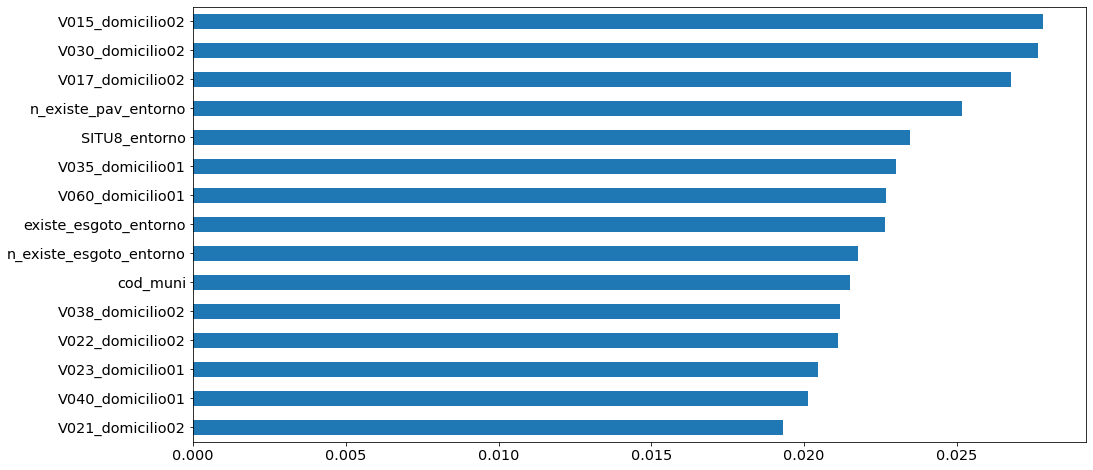

In [20]:
(pd.Series(regressor.feature_importances_, index=X.columns)
   .nlargest(15).sort_values().plot.barh())

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
X.head(1)

cod_muni  renda_media_mora  SITU1_entorno  SITU2_entorno  SITU3_entorno  \
18    290010          0.103943       0.463481            0.0            0.0   

    SITU4_entorno  SITU5_entorno  SITU6_entorno  SITU7_entorno  SITU8_entorno  \
18            0.0       0.083528            0.0            0.0       0.452991   

    V001_entorno  existe_pav_entorno  n_existe_pav_entorno  \
18           1.0            0.371018              0.090132   

    existe_calc_entorno  n_existe_calc_entorno  existe_mfio_entorno  \
18             0.293706               0.167444             0.379953   

    n_existe_mfio_entorno  existe_buero_entorno  n_existe_buero_entorno  \
18               0.081197              0.015151                0.445998   

    existe_arbo_entorno  n_existe_arbo_entorno  existe_esgoto_entorno  \
18             0.348873               0.112277                 0.0777   

    n_existe_esgoto_entorno  existe_lixo_entorno  n_existe_lixo_entorno  \
18                  0.38345             0.021756               0.439394   

    V001_domicilio01  V012_domicilio01  V013_domicilio01  V014_domicilio01  \
18               1.0          0.912505          0.001161          0.009679   

    V015_domicilio01  V016_domicilio01  V017_domicilio01  V018_domicilio01  \
18          0.073171          0.963995          0.096012          0.033682   

    V019_domicilio01  V020_domicilio01  V021_domicilio01  V022_domicilio01  \
18          0.826171          0.003872          0.000387          0.003872   

    V023_domicilio01  V024_domicilio01  V034_domicilio01  V035_domicilio01  \
18           0.03252          0.957027          0.039489          0.546651   

    V036_domicilio01  V037_domicilio01  V038_domicilio01  V039_domicilio01  \
18          0.538521           0.00813          0.381339          0.016647   

    V040_domicilio01  V041_domicilio01  V042_domicilio01  V043_domicilio01  \
18          0.039876               0.0          0.012002          0.966705   

    V046_domicilio01  V060_domicilio01  V061_domicilio01  V001_domicilio02  \
18           0.02981          0.121564          0.078204               1.0   

    V012_domicilio02  V013_domicilio02  V014_domicilio02  V015_domicilio02  \
18          0.903078          0.001082          0.010702          0.083333   

    V016_domicilio02  V017_domicilio02  V018_domicilio02  V019_domicilio02  \
18          0.968975          0.087061          0.034271          0.839105   

    V020_domicilio02  V021_domicilio02  V022_domicilio02  V023_domicilio02  \
18          0.003968           0.00024          0.004329          0.029221   

    V024_domicilio02  V029_domicilio02  V030_domicilio02  V031_domicilio02  \
18          0.963083          0.035113          0.536315          0.530423   

    V032_domicilio02  V033_domicilio02  V034_domicilio02  V035_domicilio02  \
18          0.005892           0.39911          0.016835          0.035354   

    V036_domicilio02  V037_domicilio02  V038_domicilio02  V041_domicilio02  \
18               0.0          0.010582          0.970779          0.027417   

    V045_domicilio02  V089_domicilio02  
18          0.490861          0.509139

### seleção dos 15 mais importantes para prosseguir com o XGBoost

In [23]:
X = df40.loc[:, ['cod_muni','n_existe_pav_entorno','existe_esgoto_entorno','n_existe_esgoto_entorno','V015_entorno02','V030_entorno02','V017_entorno02','SITU8_entorno','V035_entorno01','V060_entorno01','V038_entorno02','V022_entorno02','V023_entorno02','V040_entorno01','V021_entorno02']]

C:\Users\aferr\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



In [24]:
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size =0.3, random_state=1234)

In [25]:
x_train

cod_muni  n_existe_pav_entorno  existe_esgoto_entorno  \
120031    430600              0.038783               0.004491   
109445    355270              0.004806               0.008956   
83144     351740              0.004265               0.002927   
60011     315733              0.022222               0.000000   
75376     350745              0.054993               0.000000   
...          ...                   ...                    ...   
15454     292290              0.272596               0.275637   
120406    430632              0.122275               0.000000   
36744     312235              0.184578               0.485125   
72986     350430              0.053777               0.000640   
39688     312733              0.189831               0.006780   

        n_existe_esgoto_entorno  V015_entorno02  V030_entorno02  \
120031                 0.499898             NaN             NaN   
109445                 0.871341             NaN             NaN   
83144                  0.958187             NaN             NaN   
60011                  0.998809             NaN             NaN   
75376                  0.871201             NaN             NaN   
...                         ...             ...             ...   
15454                  0.238123             NaN             NaN   
120406                 0.299526             NaN             NaN   
36744                  0.474195             NaN             NaN   
72986                  0.674776             NaN             NaN   
39688                  0.273898             NaN             NaN   

        V017_entorno02  SITU8_entorno  V035_entorno01  V060_entorno01  \
120031             NaN       0.481119             NaN             NaN   
109445             NaN       0.102665             NaN             NaN   
83144              NaN       0.038050             NaN             NaN   
60011              NaN       0.000000             NaN             NaN   
75376              NaN       0.127352             NaN             NaN   
...                ...            ...             ...             ...   
15454              NaN       0.385139             NaN             NaN   
120406             NaN       0.700474             NaN             NaN   
36744              NaN       0.037644             NaN             NaN   
72986              NaN       0.307298             NaN             NaN   
39688              NaN       0.505085             NaN             NaN   

        V038_entorno02  V022_entorno02  V023_entorno02  V040_entorno01  \
120031             NaN             NaN             NaN             NaN   
109445             NaN             NaN             NaN             NaN   
83144              NaN             NaN             NaN             NaN   
60011              NaN             NaN             NaN             NaN   
75376              NaN             NaN             NaN             NaN   
...                ...             ...             ...             ...   
15454              NaN             NaN             NaN             NaN   
120406             NaN             NaN             NaN             NaN   
36744              NaN             NaN             NaN             NaN   
72986              NaN             NaN             NaN             NaN   
39688              NaN             NaN             NaN             NaN   

        V021_entorno02  
120031             NaN  
109445             NaN  
83144              NaN  
60011              NaN  
75376              NaN  
...                ...  
15454              NaN  
120406             NaN  
36744              NaN  
72986              NaN  
39688              NaN  

[1686 rows x 15 columns]

In [26]:
x_train.describe()

cod_muni  n_existe_pav_entorno  existe_esgoto_entorno  \
count    1686.000000           1686.000000            1686.000000   
mean   345583.150652              0.117673               0.030994   
std     48981.313067              0.118464               0.063185   
min    290020.000000              0.000000               0.000000   
25%    311932.500000              0.028997               0.000000   
50%    316932.500000              0.080459               0.005823   
75%    354998.750000              0.167599               0.030218   
max    432380.000000              0.799231               0.623831   

       n_existe_esgoto_entorno  V015_entorno02  V030_entorno02  \
count              1686.000000             0.0             0.0   
mean                  0.641426             NaN             NaN   
std                   0.226636             NaN             NaN   
min                   0.047399             NaN             NaN   
25%                   0.470401             NaN             NaN   
50%                   0.675200             NaN             NaN   
75%                   0.836148             NaN             NaN   
max                   0.998809             NaN             NaN   

       V017_entorno02  SITU8_entorno  V035_entorno01  V060_entorno01  \
count             0.0    1686.000000             0.0             0.0   
mean              NaN       0.283213             NaN             NaN   
std               NaN       0.208447             NaN             NaN   
min               NaN       0.000000             NaN             NaN   
25%               NaN       0.107874             NaN             NaN   
50%               NaN       0.238346             NaN             NaN   
75%               NaN       0.435165             NaN             NaN   
max               NaN       0.939333             NaN             NaN   

       V038_entorno02  V022_entorno02  V023_entorno02  V040_entorno01  \
count             0.0             0.0             0.0             0.0   
mean              NaN             NaN             NaN             NaN   
std               NaN             NaN             NaN             NaN   
min               NaN             NaN             NaN             NaN   
25%               NaN             NaN             NaN             NaN   
50%               NaN             NaN             NaN             NaN   
75%               NaN             NaN             NaN             NaN   
max               NaN             NaN             NaN             NaN   

       V021_entorno02  
count             0.0  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN

In [27]:
y_pred_1 = regressor.predict(X_test)

In [28]:
mean_squared_error(y_test, y_pred_1)

4.4090257711601985e-06

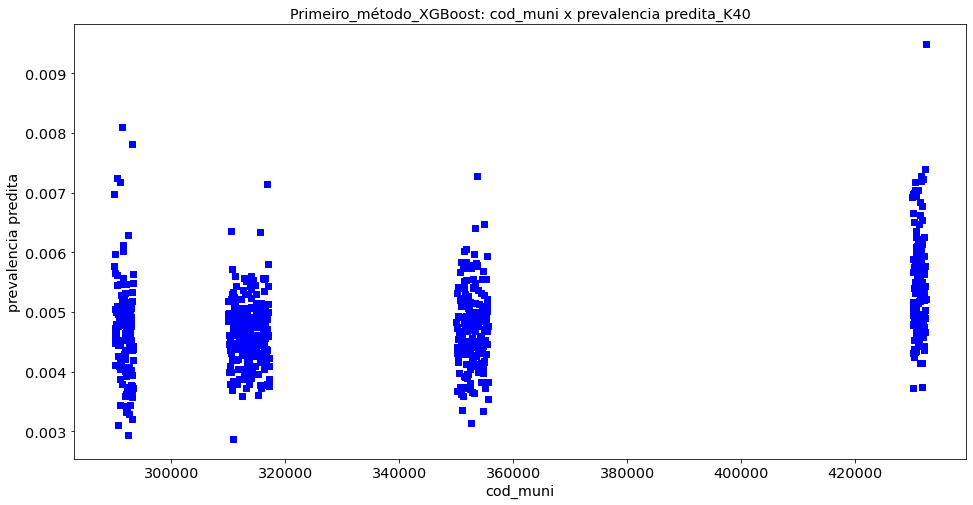

In [33]:
plt.scatter(X_test['cod_muni'], y_pred_1, c = "blue", marker = "s")
plt.title("Primeiro_método_XGBoost: cod_muni x prevalencia predita_K40")
plt.xlabel("cod_muni")
plt.ylabel("prevalencia predita")
plt.show()

In [34]:
errop1= (y_test - y_pred_1)/y_test

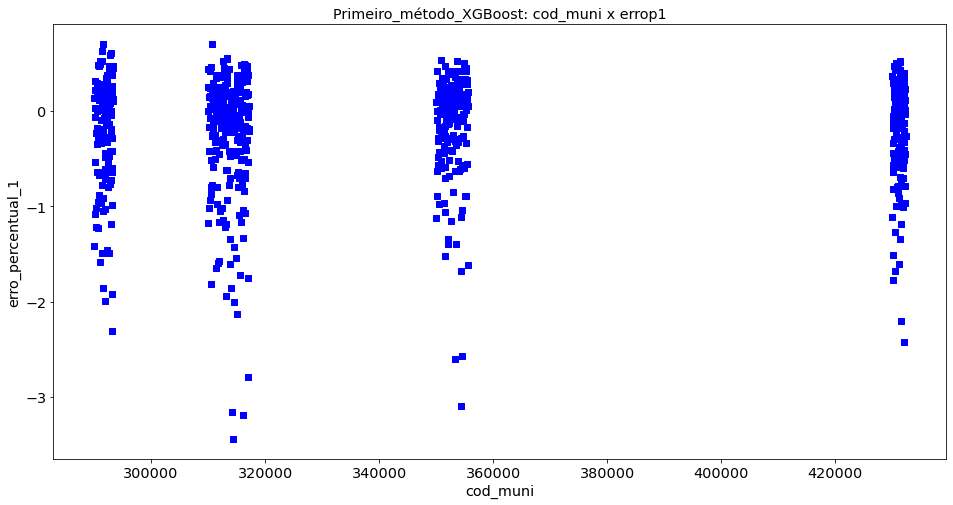

In [35]:
plt.scatter(X_test['cod_muni'], errop1, c = "blue", marker = "s")
plt.title("Primeiro_método_XGBoost: cod_muni x errop1")
plt.xlabel("cod_muni")
plt.ylabel("erro_percentual_1")
plt.show()

### Segundo método XGBoost

In [228]:
# https://www.kaggle.com/pablocastilla/predict-house-prices-with-xgboost-regression

In [229]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import skew
from collections import OrderedDict

In [230]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [231]:
model.fit(X_train,y_train)

C:\Users\aferr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[12:34:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [232]:
#for tuning parameters
#parameters_for_testing = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
#}

                    
#xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

#gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')#gsearch1.fit(train_x,train_y)
#print (gsearch1.grid_scores_)
#print('best params')
#print (gsearch1.best_params_)
#print('best score')
#print (gsearch1.best_score_)

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)

[12:35:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [233]:
y_pred_2 = best_xgb_model.predict(X_test)

In [234]:
mean_squared_error(y_test, y_pred)

5.151493190886749e-06

In [235]:
y_pred_2

array([0.0052909 , 0.0052909 , 0.00535223, 0.0060676 , 0.00547966,
       0.00531405, 0.0053851 , 0.00536239, 0.00550467, 0.00531924,
       0.0052909 , 0.0052909 , 0.00637671, 0.00538671, 0.0052909 ,
       0.0059939 , 0.00534892, 0.00530034, 0.0063605 , 0.0052909 ,
       0.0052909 , 0.0052909 , 0.0052909 , 0.0052909 , 0.0052909 ,
       0.0052909 , 0.00591952, 0.0052909 , 0.0052909 , 0.0052909 ,
       0.00536054, 0.00586128, 0.00642553, 0.0052909 , 0.0052909 ,
       0.00531405, 0.00537068, 0.00576228, 0.00716189, 0.0052909 ,
       0.00559023, 0.0052909 , 0.00534567, 0.00560981, 0.00531924,
       0.0052909 , 0.0052909 , 0.0052909 , 0.0052909 , 0.00566307,
       0.0052909 , 0.00544578, 0.00530034, 0.0052909 , 0.00535223,
       0.00570998, 0.00533327, 0.0052909 , 0.0053013 , 0.0052909 ,
       0.00546461, 0.0052909 , 0.00554577, 0.00530034, 0.0052909 ,
       0.00532544, 0.0052909 , 0.00557423, 0.0052909 , 0.0052909 ,
       0.00536168, 0.00571075, 0.0052909 , 0.0052909 , 0.00533

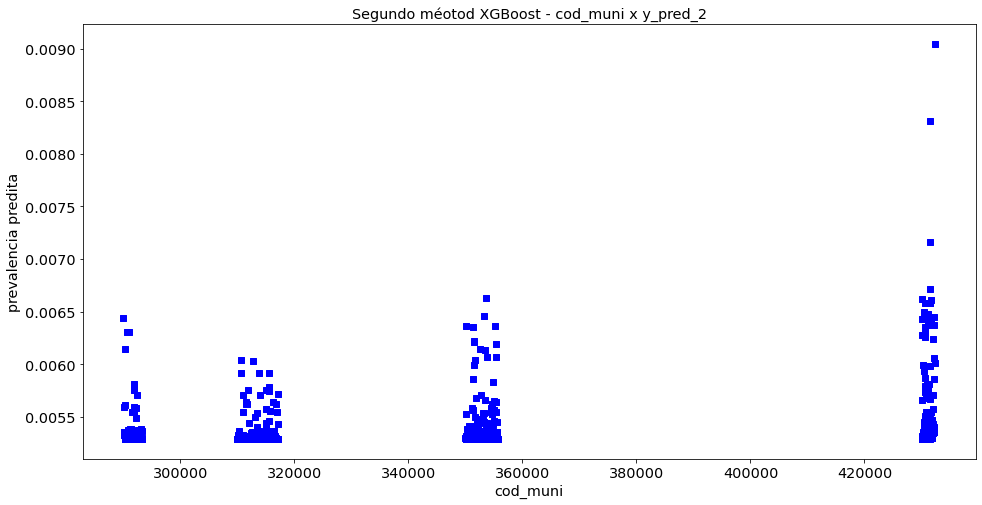

In [236]:
plt.scatter(X_test['cod_muni'], y_pred, c = "blue", marker = "s")
plt.title("Segundo méotod XGBoost - cod_muni x y_pred_2")
plt.xlabel("cod_muni")
plt.ylabel("prevalencia predita")
plt.show()

In [237]:
erro = y_test - y_pred_2

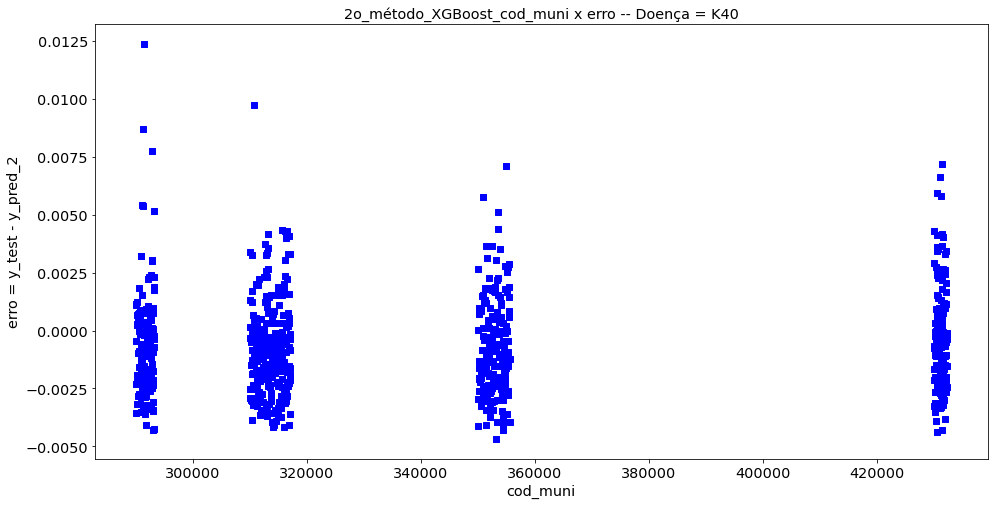

In [269]:
plt.scatter(X_test['cod_muni'], erro, c = "blue", marker = "s")
plt.title("2o_método_XGBoost_cod_muni x erro -- Doença = K40")
plt.xlabel("cod_muni")
plt.ylabel("erro = y_test - y_pred_2")
plt.show()

In [239]:
X.sample(1)

cod_muni  n_existe_pav_entorno  existe_esgoto_entorno  \
122527    430810              0.348982               0.002635   

        n_existe_esgoto_entorno  V015_entorno02  V030_entorno02  \
122527                 0.727904             NaN             NaN   

        V017_entorno02  SITU8_entorno  V035_entorno01  V060_entorno01  \
122527             NaN       0.233293             NaN             NaN   

        V038_entorno02  V022_entorno02  V023_entorno02  V040_entorno01  \
122527             NaN             NaN             NaN             NaN   

        V021_entorno02  
122527             NaN

In [250]:
#x_in = [[430810,0.348982,0.002635,0.727904,0.0,0.0,0.0,0.233293,0,0,0,0,0,0,0]]
#x = np.array(x_in).reshape((1,-1))
#y_pred_in = best_xgb_model.predict(x)

In [251]:
#y_pred_in = best_xgb_model.predict(x_in)

In [260]:
x_in=X_test.iloc[0:2,:]

In [261]:
y_pred_in = best_xgb_model.predict(x_in)

In [270]:
# predição da prevalência
y_pred_in

array([0.0052909, 0.0052909], dtype=float32)

In [264]:
X_test.head(2)

cod_muni  renda_media_mora  SITU1_entorno  SITU2_entorno  \
28093    310840          0.274743       0.783347            0.0   
60506    315800          0.160988       0.602859            0.0   

       SITU3_entorno  SITU4_entorno  SITU5_entorno  SITU6_entorno  \
28093            0.0            0.0       0.000000            0.0   
60506            0.0            0.0       0.041492            0.0   

       SITU7_entorno  SITU8_entorno  V001_entorno  existe_pav_entorno  \
28093            0.0       0.216653           1.0            0.744476   
60506            0.0       0.355649           1.0            0.592748   

       n_existe_pav_entorno  existe_calc_entorno  n_existe_calc_entorno  \
28093              0.025982             0.703764               0.066694   
60506              0.009763             0.402720               0.199791   

       existe_mfio_entorno  n_existe_mfio_entorno  existe_buero_entorno  \
28093             0.741203               0.029255              0.204378   
60506             0.577406               0.025105              0.412831   

       n_existe_buero_entorno  existe_arbo_entorno  n_existe_arbo_entorno  \
28093                0.566080             0.515957               0.254501   
60506                0.189679             0.524059               0.078452   

       existe_esgoto_entorno  n_existe_esgoto_entorno  existe_lixo_entorno  \
28093               0.000409                 0.770049             0.001637   
60506               0.004533                 0.597978             0.003835   

       n_existe_lixo_entorno  V001_domicilio01  V012_domicilio01  \
28093               0.768822               1.0          0.752778   
60506               0.598675               1.0          0.589060   

       V013_domicilio01  V014_domicilio01  V015_domicilio01  V016_domicilio01  \
28093          0.160913          0.000397          0.055754          0.967857   
60506          0.160684          0.014359          0.216410          0.970598   

       V017_domicilio01  V018_domicilio01  V019_domicilio01  V020_domicilio01  \
28093          0.757540          0.019841          0.071825          0.006548   
60506          0.535726          0.032820          0.047863          0.002393   

       V021_domicilio01  V022_domicilio01  V023_domicilio01  V024_domicilio01  \
28093          0.109921          0.002182          0.001984          0.967262   
60506          0.288889          0.062906          0.009914          0.958633   

       V034_domicilio01  V035_domicilio01  V036_domicilio01  V037_domicilio01  \
28093          0.002579          0.886508           0.79504          0.091468   
60506          0.021880          0.658462           0.54906          0.109402   

       V038_domicilio01  V039_domicilio01  V040_domicilio01  V041_domicilio01  \
28093          0.066468          0.003968          0.003770          0.000000   
60506          0.286496          0.008889          0.017094          0.005812   

       V042_domicilio01  V043_domicilio01  V046_domicilio01  V060_domicilio01  \
28093          0.009127          0.966270          0.003571          0.098413   
60506          0.003761          0.964444          0.016068          0.089573   

       V061_domicilio01  V001_domicilio02  V012_domicilio02  V013_domicilio02  \
28093          0.090873               1.0          0.747185          0.176542   
60506          0.092991               1.0          0.591926          0.151441   

       V014_domicilio02  V015_domicilio02  V016_domicilio02  V017_domicilio02  \
28093          0.000201          0.058043          0.980965          0.754692   
60506          0.011278          0.239670          0.987491          0.552028   

       V018_domicilio02  V019_domicilio02  V020_domicilio02  V021_domicilio02  \
28093          0.019839          0.078016          0.006971          0.118700   
60506          0.028052          0.041414          0.002748          0.301933   

       V022_domicilio02  V023_domicilio02  V024_domicilio

In [265]:
x_in.head(2)

cod_muni  renda_media_mora  SITU1_entorno  SITU2_entorno  \
28093    310840          0.274743       0.783347            0.0   
60506    315800          0.160988       0.602859            0.0   

       SITU3_entorno  SITU4_entorno  SITU5_entorno  SITU6_entorno  \
28093            0.0            0.0       0.000000            0.0   
60506            0.0            0.0       0.041492            0.0   

       SITU7_entorno  SITU8_entorno  V001_entorno  existe_pav_entorno  \
28093            0.0       0.216653           1.0            0.744476   
60506            0.0       0.355649           1.0            0.592748   

       n_existe_pav_entorno  existe_calc_entorno  n_existe_calc_entorno  \
28093              0.025982             0.703764               0.066694   
60506              0.009763             0.402720               0.199791   

       existe_mfio_entorno  n_existe_mfio_entorno  existe_buero_entorno  \
28093             0.741203               0.029255              0.204378   
60506             0.577406               0.025105              0.412831   

       n_existe_buero_entorno  existe_arbo_entorno  n_existe_arbo_entorno  \
28093                0.566080             0.515957               0.254501   
60506                0.189679             0.524059               0.078452   

       existe_esgoto_entorno  n_existe_esgoto_entorno  existe_lixo_entorno  \
28093               0.000409                 0.770049             0.001637   
60506               0.004533                 0.597978             0.003835   

       n_existe_lixo_entorno  V001_domicilio01  V012_domicilio01  \
28093               0.768822               1.0          0.752778   
60506               0.598675               1.0          0.589060   

       V013_domicilio01  V014_domicilio01  V015_domicilio01  V016_domicilio01  \
28093          0.160913          0.000397          0.055754          0.967857   
60506          0.160684          0.014359          0.216410          0.970598   

       V017_domicilio01  V018_domicilio01  V019_domicilio01  V020_domicilio01  \
28093          0.757540          0.019841          0.071825          0.006548   
60506          0.535726          0.032820          0.047863          0.002393   

       V021_domicilio01  V022_domicilio01  V023_domicilio01  V024_domicilio01  \
28093          0.109921          0.002182          0.001984          0.967262   
60506          0.288889          0.062906          0.009914          0.958633   

       V034_domicilio01  V035_domicilio01  V036_domicilio01  V037_domicilio01  \
28093          0.002579          0.886508           0.79504          0.091468   
60506          0.021880          0.658462           0.54906          0.109402   

       V038_domicilio01  V039_domicilio01  V040_domicilio01  V041_domicilio01  \
28093          0.066468          0.003968          0.003770          0.000000   
60506          0.286496          0.008889          0.017094          0.005812   

       V042_domicilio01  V043_domicilio01  V046_domicilio01  V060_domicilio01  \
28093          0.009127          0.966270          0.003571          0.098413   
60506          0.003761          0.964444          0.016068          0.089573   

       V061_domicilio01  V001_domicilio02  V012_domicilio02  V013_domicilio02  \
28093          0.090873               1.0          0.747185          0.176542   
60506          0.092991               1.0          0.591926          0.151441   

       V014_domicilio02  V015_domicilio02  V016_domicilio02  V017_domicilio02  \
28093          0.000201          0.058043          0.980965          0.754692   
60506          0.011278          0.239670          0.987491          0.552028   

       V018_domicilio02  V019_domicilio02  V020_domicilio02  V021_domicilio02  \
28093          0.019839          0.078016          0.006971          0.118700   
60506          0.028052          0.041414          0.002748          0.301933   

       V022_domicilio02  V023_domicilio02  V024_domicilio

In [267]:
y_test

28093     0.003891
60506     0.002192
110943    0.007238
109620    0.005609
124632    0.003473
            ...   
36559     0.004058
110742    0.006152
83532     0.006113
59033     0.004786
29783     0.003588
Name: prevalencia, Length: 723, dtype: float64